In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [5]:
df = pd.read_csv("boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df.shape

(506, 14)

In [12]:
x = df.drop(['MEDV'],axis = 1).values
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
y = df['MEDV'].values
y = pd.DataFrame(y)
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Mean Squared Error: 27.20
R-Squared 0.67
Accuracy Score: 0.7378284679886178
     Acutal Values  predicted values  Difference
0             22.6         24.935708   -2.335708
1             50.0         23.751632   26.248368
2             23.0         29.326383   -6.326383
3              8.3         11.975346   -3.675346
4             21.2         21.372725   -0.172725
..             ...               ...         ...
147           36.2         27.811077    8.388923
148           11.0         14.506816   -3.506816
149            7.2          7.573699   -0.373699
150           22.8         28.334807   -5.534807
151           28.7         25.043412    3.656588

[152 rows x 3 columns]
coefficient: [[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
  -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
   2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
  -4.86738066e-01]]
Intercept: [37.93710774]


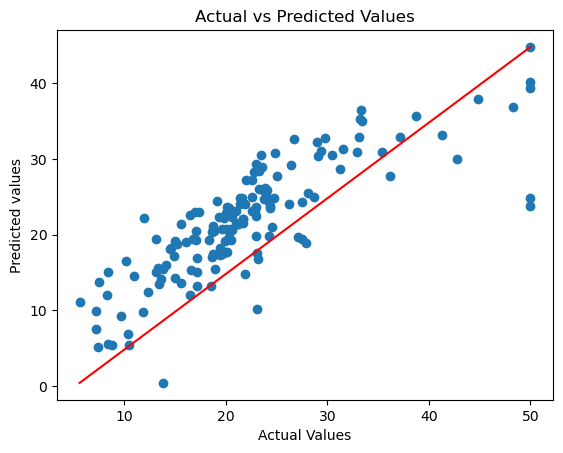

In [16]:
#iteration - 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 21.52
R-Squared 0.71
Accuracy Score: 0.7365934508044955
     Acutal Values  predicted values  Difference
0             23.6         28.648960   -5.048960
1             32.4         36.495014   -4.095014
2             13.6         15.411193   -1.811193
3             22.8         25.403213   -2.603213
4             16.1         18.855280   -2.755280
..             ...               ...         ...
147           17.1         17.403672   -0.303672
148           14.5         13.385941    1.114059
149           50.0         39.983425   10.016575
150           14.3         16.682863   -2.382863
151           12.6         18.285618   -5.685618

[152 rows x 3 columns]
coefficient: [[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]
Intercept: [31.63108404]


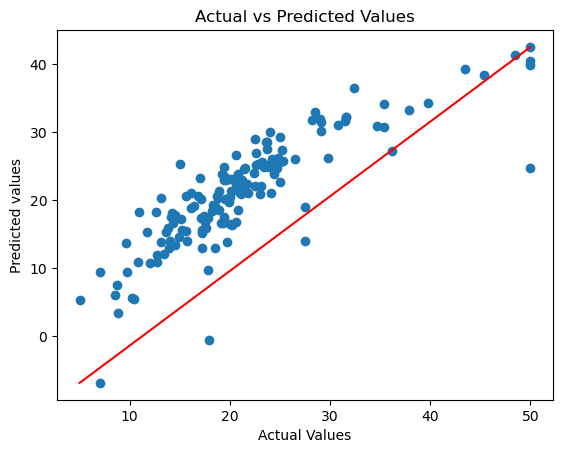

In [18]:
#iteration - 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 25.79
R-Squared 0.69
Accuracy Score: 0.7361196190442467
     Acutal Values  predicted values  Difference
0             22.6         24.581552   -1.981552
1             50.0         24.516293   25.483707
2             23.0         29.713799   -6.713799
3              8.3         12.511327   -4.211327
4             21.2         21.349654   -0.149654
..             ...               ...         ...
198           22.1         27.219549   -5.119549
199           46.0         40.065076    5.934924
200           22.9         29.489264   -6.589264
201           20.2         16.588711    3.611289
202           43.1         37.210154    5.889846

[203 rows x 3 columns]
coefficient: [[-1.03747356e-01  5.58589924e-02  5.88240770e-02  2.50523544e+00
  -1.90284888e+01  3.25353601e+00 -3.22150522e-03 -1.57603462e+00
   2.58716068e-01 -1.14681299e-02 -1.10777478e+00  5.50051783e-03
  -5.59569992e-01]]
Intercept: [45.48141959]


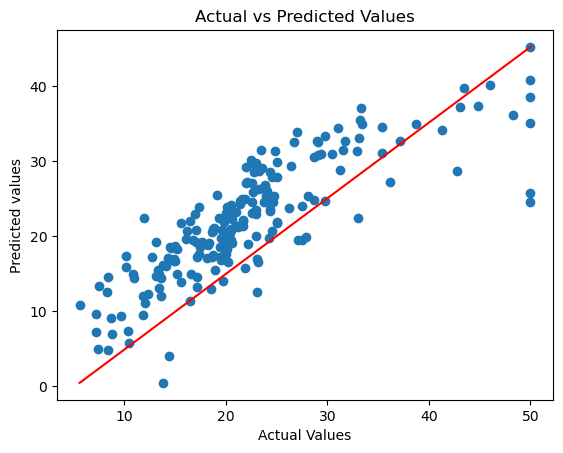

In [20]:
#iteration - 2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 0)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 21.83
R-Squared 0.71
Accuracy Score: 0.7362442925015322
     Acutal Values  predicted values  Difference
0             23.6         28.700257   -5.100257
1             32.4         37.275424   -4.875424
2             13.6         14.450663   -0.850663
3             22.8         25.734356   -2.934356
4             16.1         18.497639   -2.397639
..             ...               ...         ...
198           16.7         19.366259   -2.666259
199           13.8         11.536608    2.263392
200           22.9         28.982763   -6.082763
201           15.3         21.744787   -6.444787
202           27.5         32.575230   -5.075230

[203 rows x 3 columns]
coefficient: [[-1.13498178e-01  3.79976868e-02  2.99876109e-02  3.51131977e+00
  -1.44513558e+01  3.80534175e+00 -1.79553906e-02 -1.48968845e+00
   2.53016064e-01 -1.00262729e-02 -8.86408743e-01  1.08462004e-02
  -5.75917903e-01]]
Intercept: [34.33026077]


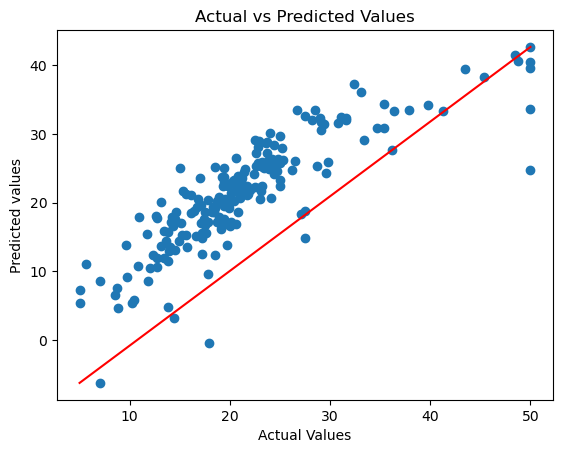

In [22]:
#iteration - 2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 25.30
R-Squared 0.67
Accuracy Score: 0.7338886125756774
     Acutal Values  predicted values  Difference
0             22.6         24.709603   -2.109603
1             50.0         25.126314   24.873686
2             23.0         30.765033   -7.765033
3              8.3         12.414055   -4.114055
4             21.2         21.295995   -0.095995
..             ...               ...         ...
248           32.2         32.604891   -0.404891
249           13.5         12.787651    0.712349
250           17.9          1.206608   16.693392
251           13.3         19.442771   -6.142771
252           11.7         15.319865   -3.619865

[253 rows x 3 columns]
coefficient: [[-1.22697052e-01  5.76835439e-02  7.42047961e-02  3.38949970e+00
  -1.65391519e+01  3.57730248e+00 -2.98033902e-03 -1.55759520e+00
   2.50098217e-01 -9.73850155e-03 -1.12527834e+00  6.85073312e-03
  -5.92410460e-01]]
Intercept: [41.58607683]


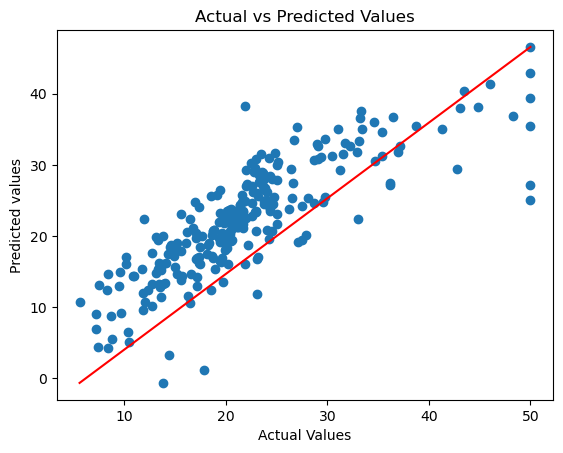

In [24]:
#iteration - 3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 0)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 25.18
R-Squared 0.69
Accuracy Score: 0.7325693559556034
     Acutal Values  predicted values  Difference
0             23.6         28.280203   -4.680203
1             32.4         37.739436   -5.339436
2             13.6         15.407600   -1.807600
3             22.8         25.441452   -2.641452
4             16.1         18.605815   -2.505815
..             ...               ...         ...
248           19.3         20.360373   -1.060373
249           23.9         26.435753   -2.535753
250           24.7         23.326693    1.373307
251           19.8         18.110622    1.689378
252           23.8         22.463210    1.336790

[253 rows x 3 columns]
coefficient: [[-1.17646736e-01  3.32466019e-02  3.05213436e-02  4.40864134e+00
  -1.34354334e+01  4.54696921e+00 -2.19317442e-02 -1.44431337e+00
   1.98900056e-01 -8.07440421e-03 -8.09040596e-01  1.11002543e-02
  -5.15546338e-01]]
Intercept: [26.60863721]


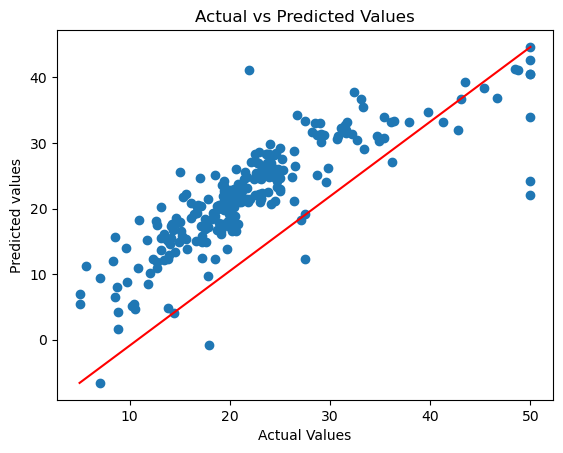

In [26]:
#iteration - 3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 42)
type(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared {r2:.2f}")
print("Accuracy Score:",model.score(x,y))
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Acutal Values":y_test, "predicted values":y_predict, "Difference":y_test-y_predict})
print(pred_y_df)
print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)
plt.scatter(y_test,y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_predict), max(y_predict)], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()